# Implementing BB84 Protocol

d:\pythonQuantum\.venv\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: d:\pythonQuantum\.venv\Lib\site-packages\qiskit\visualization\circuit\styles\iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


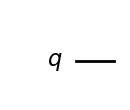

  Estado do qubit 0 (vetor de estado): [1.+0.j 0.+0.j]
  Visualização do estado do qubit 0 na Esfera de Bloch:


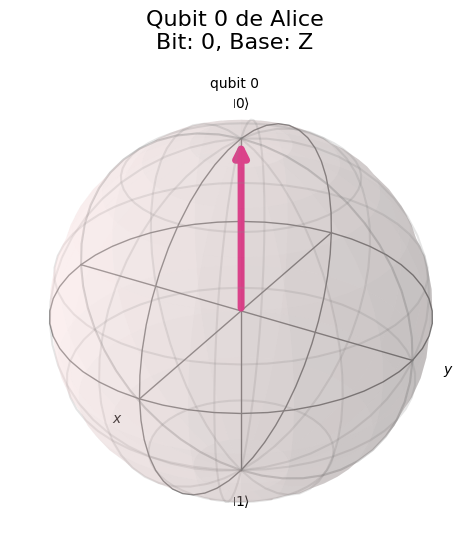

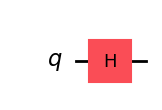

  Estado do qubit 1 (vetor de estado): [0.707+0.j 0.707+0.j]
  Visualização do estado do qubit 1 na Esfera de Bloch:


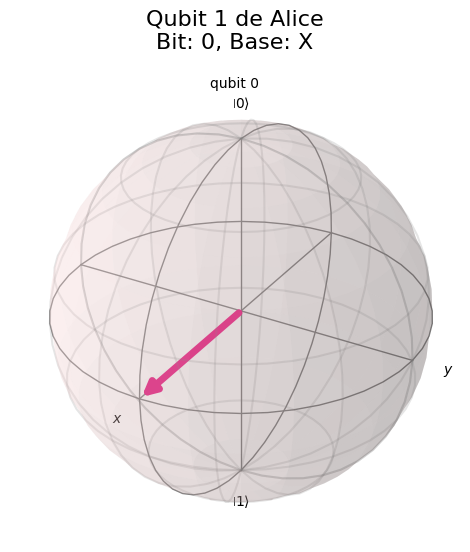

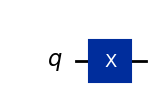

  Estado do qubit 2 (vetor de estado): [0.+0.j 1.+0.j]
  Visualização do estado do qubit 2 na Esfera de Bloch:


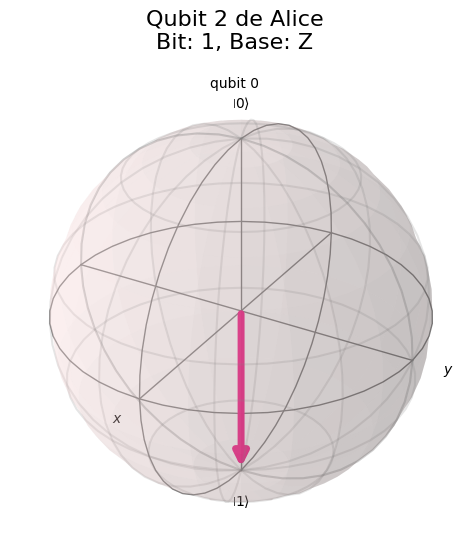

   
q: 
   

--- Fim da Preparação de Alice ---
Alice preparou 3 qubits.


In [ ]:
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from  qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
# Simulação do protocolo BB84 com Qiskit
# Importante: Instale o Qiskit com `pip install qiskit` se ainda não o fez.

# Passos protocolo bb84
# 1. Alice escolha uma base aleatória para cada qubit
# 2. Alice escolha um bit aleatório para cada qubit
# 3. Alice envia os qubits para Bob

def generate_random_bases(num_qubits):
  return np.random.choice(['Z', 'X'], size=num_qubits)

def generate_random_bits(num_qubits):
  return np.random.randint(0, 2, size=num_qubits)

def alice_prepare_qubits(num_qubits, alice_bits, alice_bases):
  circuits = []

  for i in range(num_qubits):
    qc = QuantumCircuit(1, name=f'Alice_q{i}')

    if alice_bits[i] == 1:
      qc.x(0)

    if alice_bases[i] == 'X':
      qc.h(0)
    
    try:
        display(qc.draw('mpl', style='iqx'))
    except NameError: # Se display não estiver definido (ex: script Python puro)
        print(qc.draw('text')) # Alternativa em texto
    plt.show() # Garante que o plot seja exibido

    state_vec = Statevector(qc)
    print(f"  Estado do qubit {i} (vetor de estado): {state_vec.data.round(3)}") # Mostra o vetor arredondado
    print(f"  Visualização do estado do qubit {i} na Esfera de Bloch:")
    try:
        display(plot_bloch_multivector(state_vec, title=f"Qubit {i} de Alice\nBit: {alice_bits[i]}, Base: {alice_bases[i]}"))
    except NameError:
        plot_bloch_multivector(state_vec, title=f"Qubit {i} de Alice\nBit: {alice_bits[i]}, Base: {alice_bases[i]}")
    plt.show()

    circuits.append(qc)
  return circuits

num_qubits = 3
alice_bases = generate_random_bases(num_qubits=num_qubits)
alice_bits = generate_random_bits(num_qubits=num_qubits)
alice_circuits = alice_prepare_qubits(num_qubits, alice_bits, alice_bases)
# sample = Statevector([1, 0]).evolve(alice_circuits[0])

# plot_histogram(sample.sample_counts(1000), title="Distribuição de Amostras do Qubit 0 de Alice")

print("\n--- Fim da Preparação de Alice ---")
print(f"Alice preparou {len(alice_circuits)} qubits.")
# Simulate Alice's circuits





Contagem dos estados preparados por Alice:
  |-⟩ (Base X, Bit 1): 255
  |1⟩ (Base Z, Bit 1): 224
  |0⟩ (Base Z, Bit 0): 269
  |+⟩ (Base X, Bit 0): 252

Histograma de Frequências dos Estados Preparados por Alice:


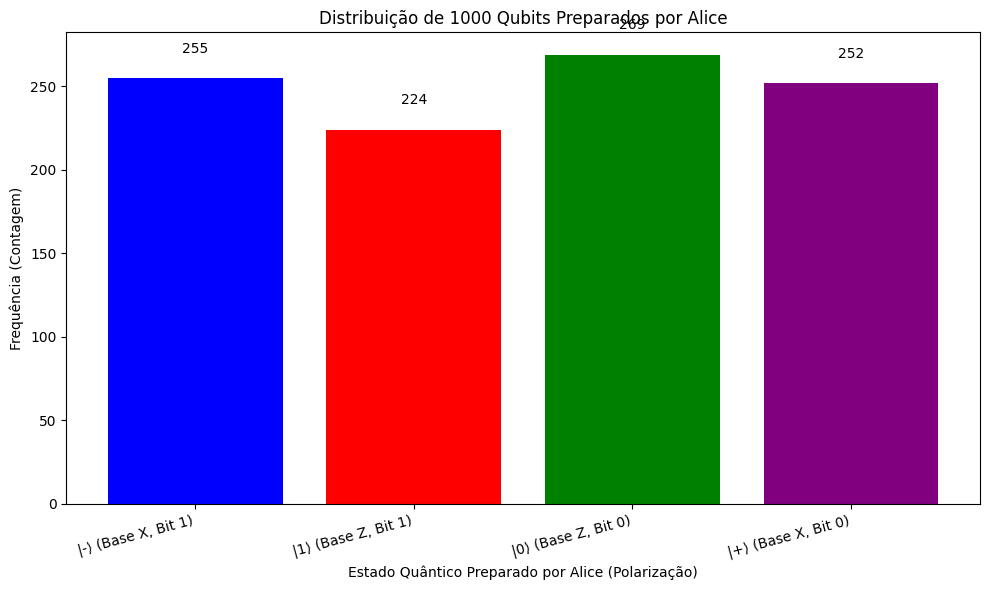

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram # Usaremos para plotar as frequências
import matplotlib.pyplot as plt
from collections import Counter # Para contar as ocorrências

def generate_random_bases(num_qubits):
  return np.random.choice(['Z', 'X'], size=num_qubits)

def generate_random_bits(num_qubits):
  return np.random.randint(0, 2, size=num_qubits)


# --- PASSO 1: Simular as escolhas de Alice para muitos qubits ---
num_total_qubits_simulados = 1000 # Vamos simular Alice preparando 1000 qubits

alice_bases_simuladas = generate_random_bases(num_qubits=num_total_qubits_simulados)
alice_bits_simulados = generate_random_bits(num_qubits=num_total_qubits_simulados)

# --- PASSO 2: Identificar a polarização de cada qubit ---
# Vamos criar uma lista para armazenar a descrição de cada estado preparado
estados_preparados_alice = []

for i in range(num_total_qubits_simulados):
    bit = alice_bits_simulados[i]
    base = alice_bases_simuladas[i]
    
    estado_desc = ""
    if base == 'Z':
        if bit == 0:
            estado_desc = "|0⟩ (Base Z, Bit 0)"
        else: # bit == 1
            estado_desc = "|1⟩ (Base Z, Bit 1)"
    elif base == 'X':
        if bit == 0:
            estado_desc = "|+⟩ (Base X, Bit 0)"
        else: # bit == 1
            estado_desc = "|-⟩ (Base X, Bit 1)"
    estados_preparados_alice.append(estado_desc)

# --- PASSO 3: Contar as ocorrências ---
contagem_estados = Counter(estados_preparados_alice)

print("Contagem dos estados preparados por Alice:")
for estado, contagem in contagem_estados.items():
    print(f"  {estado}: {contagem}")

# --- PASSO 4: Plotar o histograma ---
# O plot_histogram do Qiskit espera um dicionário no formato {'label': contagem}
# Nossa contagem_estados já está nesse formato.

# Verifica se há dados para plotar
if contagem_estados:
    print("\nHistograma de Frequências dos Estados Preparados por Alice:")
    # Usando matplotlib diretamente para maior controle sobre o histograma de categorias
    labels = list(contagem_estados.keys())
    counts = list(contagem_estados.values())

    plt.figure(figsize=(10, 6)) # Define o tamanho da figura
    bars = plt.bar(labels, counts, color=['blue', 'red', 'green', 'purple']) # Cria as barras
    
    # Adiciona os valores no topo de cada barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.05 * max(counts), int(yval), ha='center', va='bottom')

    plt.xlabel("Estado Quântico Preparado por Alice (Polarização)")
    plt.ylabel("Frequência (Contagem)")
    plt.title(f"Distribuição de {num_total_qubits_simulados} Qubits Preparados por Alice")
    plt.xticks(rotation=15, ha="right") # Rotaciona os labels do eixo X para melhor visualização
    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show()

    # Alternativamente, usando plot_histogram do Qiskit (menos flexível para labels longos)
    # display(plot_histogram(contagem_estados, title="Distribuição dos Qubits Preparados por Alice"))
    # plt.show() # Necessário se plot_histogram não exibir automaticamente
else:
    print("Nenhum estado foi simulado para gerar o histograma.")

Alice preparou 4 qubits.
------------------------------
--- Medição de Bob ---
Bob mediu 4 qubits.
------------------------------

--- Resultados da Medição de Bob ---


,Bit Original (Alice),Base de Alice,Base de Bob,Bit Medido (Bob),Bases coincidem,Bits coincidem
0,1,X,Z,1,False,True
1,1,X,Z,1,False,True
2,1,Z,Z,1,True,True
3,0,Z,X,0,False,True


Alice preparou 8 qubits.
------------------------------
--- Medição de Bob ---
Bob mediu 8 qubits.
------------------------------

--- Resultados da Medição de Bob ---


,Bit Original (Alice),Base de Alice,Base de Bob,Bit Medido (Bob),Bases coincidem,Bits coincidem
0,0,Z,X,1,False,False
1,0,X,Z,1,False,False
2,1,X,X,1,True,True
3,1,Z,X,0,False,False
4,1,Z,X,0,False,False
5,0,Z,X,1,False,False
6,0,Z,X,0,False,True
7,1,Z,Z,1,True,True


Alice preparou 32 qubits.
------------------------------
--- Medição de Bob ---
Bob mediu 32 qubits.
------------------------------

--- Resultados da Medição de Bob ---


,Bit Original (Alice),Base de Alice,Base de Bob,Bit Medido (Bob),Bases coincidem,Bits coincidem
0,0,Z,Z,0,True,True
1,0,X,Z,0,False,True
2,0,X,Z,1,False,False
3,1,X,Z,1,False,True
4,1,X,Z,0,False,False
5,0,Z,X,1,False,False
6,1,X,X,1,True,True
7,0,Z,Z,0,True,True
8,0,X,Z,1,False,False
9,0,X,Z,0,False,True


Alice preparou 64 qubits.
------------------------------
--- Medição de Bob ---
Bob mediu 64 qubits.
------------------------------

--- Resultados da Medição de Bob ---


,Bit Original (Alice),Base de Alice,Base de Bob,Bit Medido (Bob),Bases coincidem,Bits coincidem
0,1,Z,Z,1,True,True
1,1,Z,X,0,False,False
2,1,Z,Z,1,True,True
3,0,X,X,0,True,True
4,1,Z,X,0,False,False
...,...,...,...,...,...,...
59,1,X,Z,0,False,False
60,1,X,X,1,True,True
61,1,X,Z,1,False,True
62,1,X,X,1,True,True


Alice preparou 128 qubits.
------------------------------
--- Medição de Bob ---
Bob mediu 128 qubits.
------------------------------

--- Resultados da Medição de Bob ---


,Bit Original (Alice),Base de Alice,Base de Bob,Bit Medido (Bob),Bases coincidem,Bits coincidem
0,1,X,X,1,True,True
1,1,Z,Z,1,True,True
2,0,Z,X,1,False,False
3,1,X,Z,0,False,False
4,1,X,Z,1,False,True
...,...,...,...,...,...,...
123,0,Z,Z,0,True,True
124,1,X,X,1,True,True
125,0,X,Z,1,False,False
126,0,X,X,0,True,True


Alice preparou 256 qubits.
------------------------------
--- Medição de Bob ---
Bob mediu 256 qubits.
------------------------------

--- Resultados da Medição de Bob ---


,Bit Original (Alice),Base de Alice,Base de Bob,Bit Medido (Bob),Bases coincidem,Bits coincidem
0,1,Z,X,0,False,False
1,1,Z,X,1,False,True
2,1,Z,X,1,False,True
3,1,Z,X,1,False,True
4,1,Z,Z,1,True,True
...,...,...,...,...,...,...
251,0,X,Z,1,False,False
252,1,X,X,1,True,True
253,1,X,Z,1,False,True
254,1,X,X,1,True,True


Alice preparou 1000 qubits.
------------------------------
--- Medição de Bob ---
Bob mediu 1000 qubits.
------------------------------

--- Resultados da Medição de Bob ---


,Bit Original (Alice),Base de Alice,Base de Bob,Bit Medido (Bob),Bases coincidem,Bits coincidem
0,1,X,X,1,True,True
1,1,X,Z,1,False,True
2,0,Z,Z,0,True,True
3,1,Z,Z,1,True,True
4,0,X,X,0,True,True
...,...,...,...,...,...,...
995,1,X,Z,1,False,True
996,1,X,Z,1,False,True
997,0,Z,X,0,False,True
998,0,X,Z,1,False,False


Alice preparou 2048 qubits.
------------------------------
--- Medição de Bob ---
Bob mediu 2048 qubits.
------------------------------

--- Resultados da Medição de Bob ---


,Bit Original (Alice),Base de Alice,Base de Bob,Bit Medido (Bob),Bases coincidem,Bits coincidem
0,1,Z,Z,1,True,True
1,1,Z,Z,1,True,True
2,0,X,X,0,True,True
3,1,Z,X,1,False,True
4,1,Z,X,1,False,True
...,...,...,...,...,...,...
2043,1,X,Z,1,False,True
2044,1,X,Z,0,False,False
2045,0,Z,Z,0,True,True
2046,0,X,X,0,True,True


Alice preparou 4096 qubits.
------------------------------
--- Medição de Bob ---
Bob mediu 4096 qubits.
------------------------------

--- Resultados da Medição de Bob ---


,Bit Original (Alice),Base de Alice,Base de Bob,Bit Medido (Bob),Bases coincidem,Bits coincidem
0,0,Z,Z,0,True,True
1,0,Z,Z,0,True,True
2,1,Z,Z,1,True,True
3,0,Z,X,0,False,True
4,1,X,Z,0,False,False
...,...,...,...,...,...,...
4091,1,Z,X,0,False,False
4092,0,Z,X,1,False,False
4093,0,X,X,0,True,True
4094,0,Z,Z,0,True,True


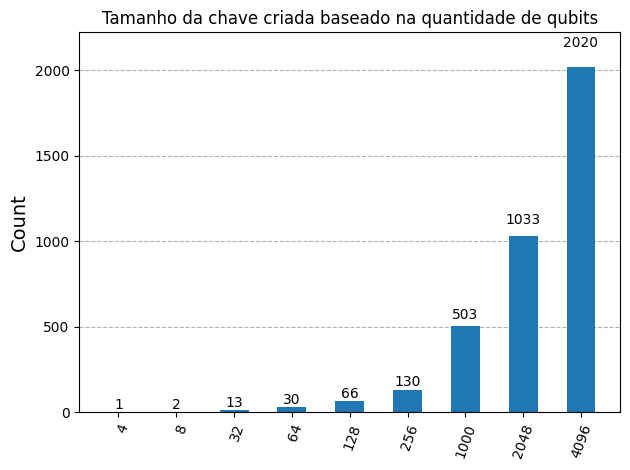

In [34]:
import numpy as np
import pandas as pd
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, transpile, ClassicalRegister
from qiskit_aer import AerSimulator

from  qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
# Simulação do protocolo BB84 com Qiskit

# Passos protocolo bb84
# 1. Alice escolha uma base aleatória para cada qubit
# 2. Alice escolha um bit aleatório para cada qubit
# 3. Alice envia os qubits para Bob

def generate_random_bases(num_qubits):
  return np.random.choice(['Z', 'X'], size=num_qubits)

def generate_random_bits(num_qubits):
  return np.random.randint(0, 2, size=num_qubits)

def alice_prepare_qubits(num_qubits, alice_bits, alice_bases):
  circuits = []

  for i in range(num_qubits):
    qc = QuantumCircuit(1, name=f'Alice_q{i}')

    if alice_bits[i] == 1:
      qc.x(0)

    if alice_bases[i] == 'X':
      qc.h(0)
    circuits.append(qc)
  
  return circuits


def bob_measure_qubits(alice_circuits, bob_bases):
    bob_measured_bits = []
    simulator = AerSimulator()
    
    for i in range(len(alice_circuits)):
        qc = alice_circuits[i].copy()
        cr = ClassicalRegister(1, name=f'Bob_cr{i}')
        qc.add_register(cr)
        
        if bob_bases[i] == 'X':
            qc.h(0)
        
        qc.measure(0, 0)
        
        job = simulator.run(qc, shots=1, memory=True)
        result = job.result()
        measured_bit = int(result.get_memory()[0])
        bob_measured_bits.append(measured_bit)
        
    return bob_measured_bits


def bb84_protocol(num_qubits_total):
  alice_bases = generate_random_bases(num_qubits=num_qubits_total)
  alice_bits = generate_random_bits(num_qubits=num_qubits_total)
  alice_circuits = alice_prepare_qubits(num_qubits_total, alice_bits, alice_bases)
  print(f"Alice preparou {len(alice_circuits)} qubits.")
  print("-" * 30)


  print("--- Medição de Bob ---")
  bob_bases = generate_random_bases(num_qubits=num_qubits_total)
  bob_results = bob_measure_qubits(alice_circuits, bob_bases)
  print(f"Bob mediu {len(bob_results)} qubits.")
  print("-" * 30)

  print("\n--- Resultados da Medição de Bob ---")

  results_df = pd.DataFrame({
      'Bit Original (Alice)': alice_bits,
      'Base de Alice': alice_bases,
      'Base de Bob': bob_bases,
      'Bit Medido (Bob)': bob_results
  })

  results_df['Bases coincidem'] = results_df['Base de Alice'] == results_df['Base de Bob']

  results_df['Bits coincidem'] = results_df['Bit Original (Alice)'] == results_df['Bit Medido (Bob)']

  try:
    display(results_df)
  except NameError:
    print(results_df)


  chave_criada = results_df[results_df['Bases coincidem'] & results_df['Bits coincidem']]['Bit Medido (Bob)'].tolist()

  return chave_criada;
  # print("\n--- Chave Criada por Bob ---")
  # print(f"Chave criada por Bob: {chave_criada}")


  # print("\n--- Resumo dos Resultados ---")
  # print("1. Onde as bases de Alice e Bob COINCIDEM, o bit medido por Bob é SEMPRE igual ao bit original de Alice.")
  # print("2. Onde as bases de Alice e Bob NÃO COINCIDEM, o bit medido por Bob tem cerca de 50% de chance de ser igual ao de Alice.")
  # print("\n--- Fim da Simulação do Protocolo BB84 ---")
  # A simulação do protocolo BB84 foi concluída com sucesso.


  # Análise do tamanho da chave criada baseada na quantidade de qubits

qubits_teste = [4, 8, 32, 64, 128, 256, 1000, 2048, 4096]

tamanho_chaves = []

for num_qubits in qubits_teste:
   tamanho_chaves.append(len(bb84_protocol(num_qubits)))

display(plot_histogram(dict(zip(qubits_teste, tamanho_chaves)), title="Tamanho da chave criada baseado na quantidade de qubits"));
